In [1]:
# This file goes through how to use singular value decomposition 
# in the generation of eigenfaces

In [2]:
import glob
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import misc

%matplotlib inline

# Reading in the Data

In [3]:
# Setting the path to the faces
data_path = os.path.join('data', 'CroppedYale')

In [4]:
# Parameters
image_width = 168
image_height = 192

In [5]:
# Reading and storing all the faces. All faces should be 2-D images of shape (192, 168)
face_paths = glob.glob('{}/**/*.pgm'.format(data_path))

faces = np.zeros(shape=(len(face_paths), image_width * image_height))

for i, face_path in enumerate(face_paths):
    # We want to confirm the shape of the faces
    faces[i] = misc.imread(face_path).flatten()

# Sample Faces

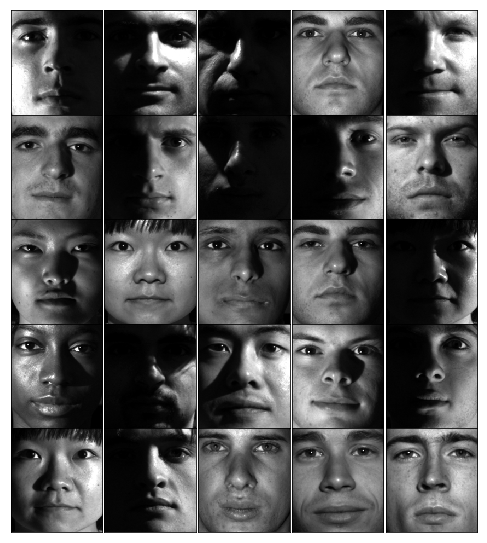

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(image_width / 20, image_height / 20))

random_faces = np.random.randint(0, len(faces), 25)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(faces[random_faces[i], :].reshape(192, 168), cmap='gray')
    ax.tick_params(
        left=False,
        labelleft=False,
        bottom=False,
        labelbottom=False
    )
    
fig.subplots_adjust(hspace=0, wspace=0)

# Performing the Singular Value Decomposition

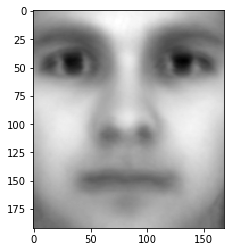

In [7]:
# First, subtracting the "mean face" from all faces
mean_face = faces.mean(axis=0)
faces -= mean_face

# Seeing what the mean face looks like
plt.imshow(mean_face.reshape(192, 168), cmap='gray')

In [8]:
# Performing the Singular Value Decomposition
u, s, v = np.linalg.svd(faces, full_matrices=False)

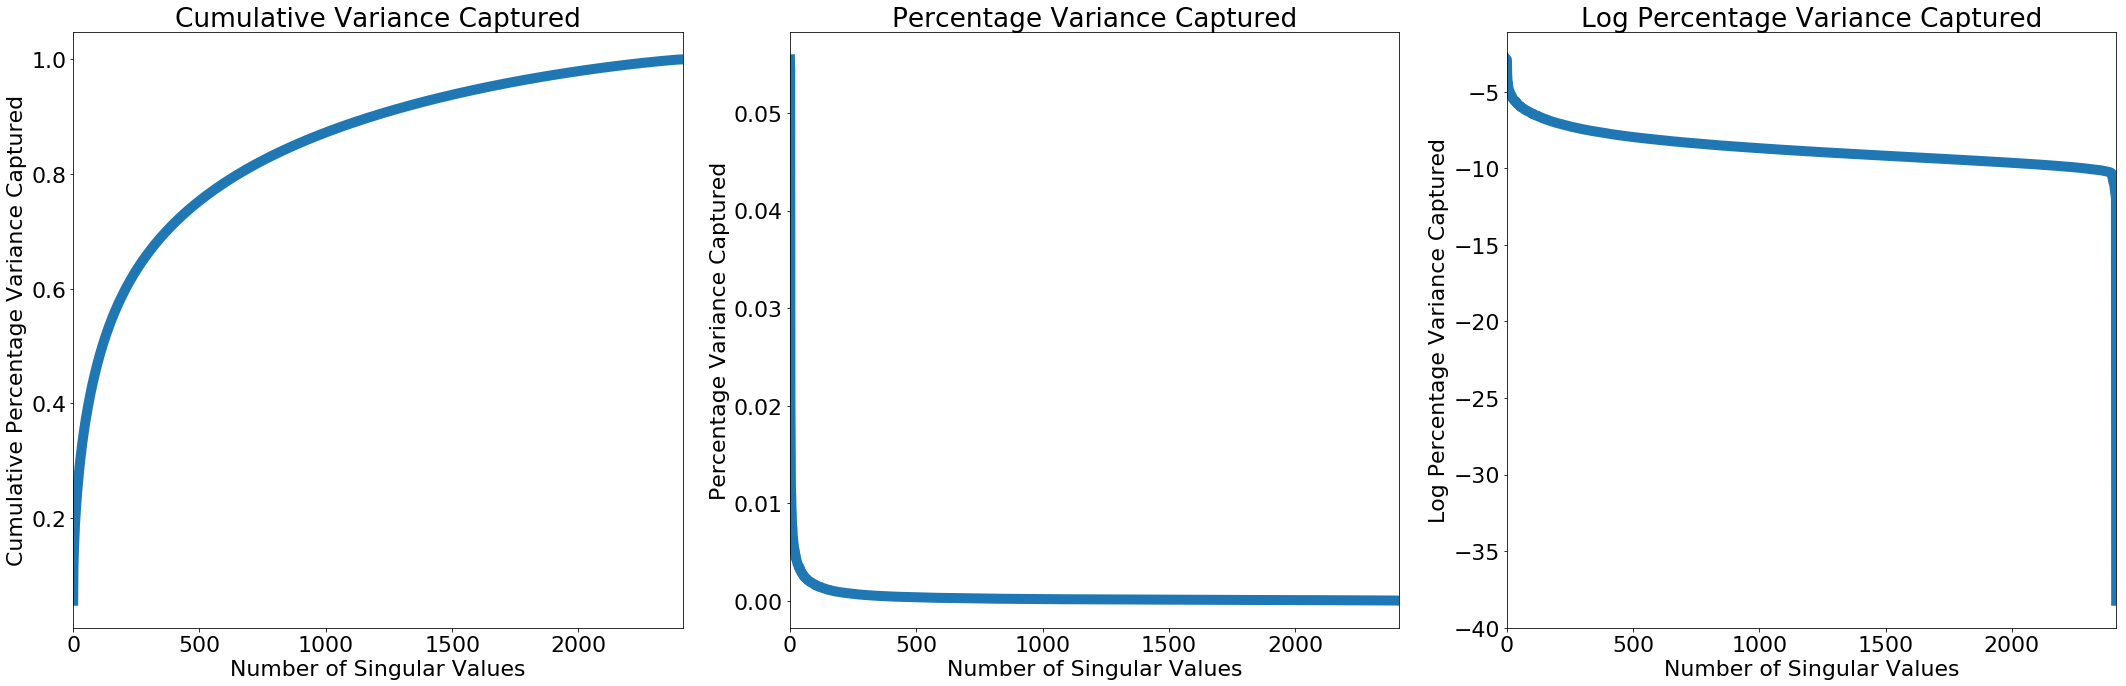

In [19]:
# Visualizing the Importance of the Singular Values
matplotlib.rcParams['figure.figsize'] = [30, 10]
matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 3)

ind = np.arange(len(s))

# Plotting the Cumulative Variance Captured
ax = axes[0]
ax.plot(ind, (np.cumsum(s) / s.sum()), linewidth=10)
ax.set_ylabel('Cumulative Percentage Variance Captured')
ax.set_xlabel('Number of Singular Values')
ax.set_title('Cumulative Variance Captured')
ax.autoscale(enable=True, axis='x', tight=True)

# Plotting the Percentage Variance Captured in the Singular Values
ax = axes[1]
ax.plot(ind, s / s.sum(), linewidth=10)
ax.set_ylabel('Percentage Variance Captured')
ax.set_xlabel('Number of Singular Values')
ax.set_title('Percentage Variance Captured')
ax.autoscale(enable=True, axis='x', tight=True)

# Plotting the Log Percentage Variance Captured in the Singular Values
ax = axes[2]
ax.plot(ind, np.log(s / s.sum()), linewidth=10)
ax.set_ylabel('Log Percentage Variance Captured')
ax.set_xlabel('Number of Singular Values')
ax.set_title('Log Percentage Variance Captured')
ax.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

In [ ]:
ind

In [ ]:
plt.imshow(u, vmin=u.min(), vmax=u.max())

In [ ]:
np.diag(u)

In [ ]:
s

In [ ]:
u.shape

In [ ]:
s

In [ ]:
v.shape

In [ ]:
plt.imshow(faces.mean(axis=0).reshape(192, 168), cmap='gray')

In [ ]:
faces.shape

In [ ]:
faces[0, :].shape

In [ ]:
plt.imshow(faces[90, :].reshape(192, 168), cmap='gray', vmin=0, vmax=255)

In [ ]:
'{}/*.pgm'.format(data_path)

In [ ]:
plt.imshow(test, cmap='gray', vmin=0, vmax=255)

In [ ]:
test

In [ ]:
test[:,:]

In [ ]:
[np.newaxis, test[:]]

In [ ]:
row = np.array([0, 1, 2])
row[:, np.newaxis]

In [ ]:
test.flatten().shape

In [ ]:
test.shape

In [ ]:
plt.imshow(test.flatten().reshape(192, 168))